In [1]:
import sys
sys.path.append("../src")
sys.path.append("../data")

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pprint as pp

In [2]:
import sindy_data
from dynamics import exp_2d_dynamics 
from dynamics import lorenz_dynamics
from dynamics import simple_harmonic_osc_dynamics
from dynamics import simple_pendulum_dynamics

from sindy import SINDy, SINDy_LSQ
from sindy_algorithms import STLSQ
from sindy_libs import PolynomialLibrary, TrigLibrary

In [3]:
dataset = np.load("../data/Z.npy")

latent_coords = sindy_data.generate_system_from_data(
    dataset, 
    dt=0.001
)
Z, Z_dot = latent_coords.training_data()
Z_dot.shape

torch.Size([10000, 2])

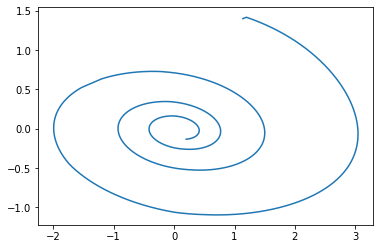

In [4]:
plt.plot(Z[:,0], Z[:,1])

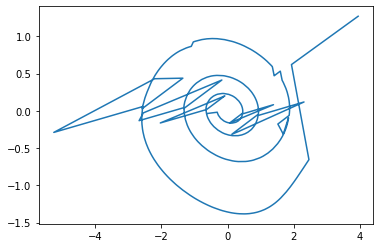

In [5]:
plt.plot(Z_dot[:,0], Z_dot[:,1])

In [6]:
model = SINDy_LSQ(
    libs=[
        PolynomialLibrary(max_degree=1),
        TrigLibrary()
    ],
    feature_names=['z1','z2'],
    algo=STLSQ(threshold = 0.04, reg=1)
)
Xi = model.fit(Z, Z_dot)
model.show()

(z1)' = -0.396 1 + 0.141 z2 + 2.433 sin(z2) + 0.458 cos(z2)
(z2)' = 0.18 1 + -0.452 z1 + 0.431 z2 + -0.734 sin(z2) + -0.16 cos(z2)


In [29]:
simple_pendulum = sindy_data.generate_system_from_dynamics(
    simple_pendulum_dynamics,
    init_conditions=(torch.pi/2, 0),
    t0=0,
    tf=10,
    steps=10000
)

X, X_dot = simple_pendulum.training_data()
X

tensor([[ 1.5708,  0.0000],
        [ 1.5708, -0.0049],
        [ 1.5708, -0.0098],
        ...,
        [-0.0833, -0.1726],
        [-0.0835, -0.1721],
        [-0.0836, -0.1716]])

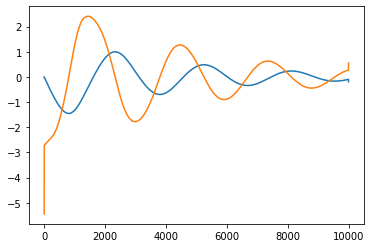

In [8]:
``plt.plot(theta_dot)

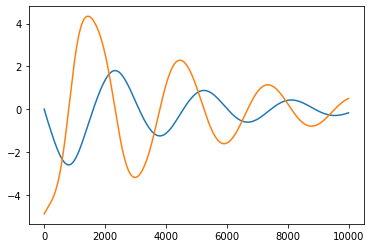

In [9]:
plt.plot(t_dot)

In [10]:
model = SINDy_LSQ(
    libs=[
        PolynomialLibrary(max_degree=1),
        TrigLibrary()
    ],
    feature_names=['z1','z2'],
    algo=STLSQ(threshold = 0.2, reg=1)
)

model.fit(theta, theta_dot)
model.show()

(z1)' = 0.556 z2
(z2)' = -0.278 z2 + -2.726 sin(z1)


In [24]:
lorenz = sindy_data.generate_system_from_dynamics(
    lorenz_dynamics,
    init_conditions=(0, 1, 1.05),
    t0=0,
    tf=10,
    steps=10000
)

X, X_dot = lorenz.training_data()

model = SINDy_LSQ(
    libs=[
        PolynomialLibrary(max_degree=2),
        TrigLibrary()
    ],
    feature_names=['x','y','z'],
    algo=STLSQ(threshold=0.1, reg=1)
)

model.fit(X, X_dot)
model.show()

(x)' = -10.0 x + 10.0 y
(y)' = 27.995 x + -0.998 y + -1.0 x z
(z)' = -2.667 z + 1.0 x y


In [12]:
exp_2d = sindy_data.generate_system_from_dynamics(
    exp_2d_dynamics,
    init_conditions=(1,1),
    t0=0,
    tf=4,
    steps=10000
)

X, X_dot = exp_2d.training_data()

X[:5]

tensor([[1.0000, 1.0000],
        [1.0008, 0.9996],
        [1.0016, 0.9992],
        [1.0024, 0.9988],
        [1.0032, 0.9984]])

In [13]:
model = SINDy(
    input_dim=X.size(),
    libs=[
        PolynomialLibrary(max_degree=1),
        TrigLibrary()
    ],
    feature_names=['x','y']
)

print(model.library())

library candidate terms:
['1', 'x', 'y', 'sin(x)', 'sin(y)', 'cos(x)', 'cos(y)']


In [14]:
model.show()

(x)' = 0.096 1 + -0.313 x + -0.002 y + 0.02 sin(x) + -0.121 sin(y) + 0.08 cos(x) + -0.109 cos(y)
(y)' = 0.37 1 + -0.198 x + -0.049 y + -0.039 sin(x) + 0.326 sin(y) + 0.198 cos(x) + -0.254 cos(y)


In [22]:
norm_2 = lambda X: torch.linalg.norm(X)

loss_fn = lambda X, X_pred: norm_2(X - X_pred)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

AttributeError: 'SINDy_LSQ' object has no attribute 'parameters'

In [23]:
epochs = 100000

for t in range(epochs):
    
    f_X = model(X)
    loss = loss_fn(X_dot, f_X)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 1000 == 0:
        print(loss)

model.show()

TypeError: 'SINDy_LSQ' object is not callable

In [ ]:
model = SINDy_LSQ(
    libs=[
        PolynomialLibrary(max_degree=1),
        TrigLibrary()
    ],
    feature_names=['x','y']
)

In [ ]:
X = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
X

In [ ]:
mask = X % 2 == 0
print(mask[:,0])
X[mask[:,0],0]

In [ ]:
small_idx = X
small_idx

In [ ]:
X = torch.tensor([
    [1.,1.,1.,1.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
], requires_grad=True)

X_dot = torch.tensor([
    [1.,1.,1.,1.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
    [2.,2.,2.,2.],
], requires_grad=True)

def f(X):
    enc = nn.Sequential(
        nn.Linear(4,8),
        nn.ReLU(),
        nn.Linear(8,4),
        nn.ReLU(),
        nn.Linear(4,2)
    )
    return enc(X)

f(X)

In [34]:
def __stack(*args):
    return '\n'.join([*args])

print(__stack('a',' b',' c  ', 'd'))


a
 b
 c  
d


In [ ]:
'''
in_n, output_dim, in_n, in_m
'''
